# About the  analysis

Tesla is an amAmericanlectric vehicle company whose aim is to accelerate the world’s transition towards 

sustainable energy. A few days back the rise in the stock prices of Tesla made Elon Musk the richest person in the

world. Predicting stock prices is a great use case of machine learning

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import fbprophet

Importing plotly failed. Interactive plots will not work.


In [2]:
df=pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-24,198.822006,200.175995,190.628006,192.169998,192.169998,54798000
1,2020-06-25,190.854004,197.195999,187.429993,197.195999,197.195999,46272500
2,2020-06-26,198.955994,199.000000,190.973999,191.947998,191.947998,44274500
3,2020-06-29,193.802002,202.000000,189.703995,201.869995,201.869995,45132000
4,2020-06-30,201.300003,217.537994,200.746002,215.962006,215.962006,84592500


In [3]:
df.sample()

,Date,Open,High,Low,Close,Adj Close,Volume
118,2020-12-10,574.369995,627.75,566.340027,627.070007,627.070007,67083200


In [4]:
df.Open.sum()

140604.07812299998

In [5]:
df.Date

0      2020-06-24
1      2020-06-25
2      2020-06-26
3      2020-06-29
4      2020-06-30
          ...    
248    2021-06-18
249    2021-06-21
250    2021-06-22
251    2021-06-23
252    2021-06-24
Name: Date, Length: 253, dtype: object

In [6]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [7]:
df['Date']=pd.to_datetime(df['Date'])

In [8]:
df['Date'].head()

0   2020-06-24
1   2020-06-25
2   2020-06-26
3   2020-06-29
4   2020-06-30
Name: Date, dtype: datetime64[ns]

In [9]:
#statistical summary 
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,555.747344,568.843288,541.038886,556.070553,556.070553,4.813483e+07
std,176.947008,179.143996,173.799264,176.661791,176.661791,2.941261e+07
min,190.854004,197.195999,187.429993,191.947998,191.947998,1.515770e+07
25%,416.000000,427.769989,406.690002,418.320007,418.320007,2.827180e+07
50%,600.549988,611.789978,582.429993,599.039978,599.039978,3.902390e+07
75%,685.700012,700.700012,667.840027,682.219971,682.219971,6.071750e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,2.221262e+08


FRom the above  the highest opening price was 891  and the hihest close price was  883

MInimum is  190  and 191 respectively 

In [10]:
#checking for null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

wow our data is clean

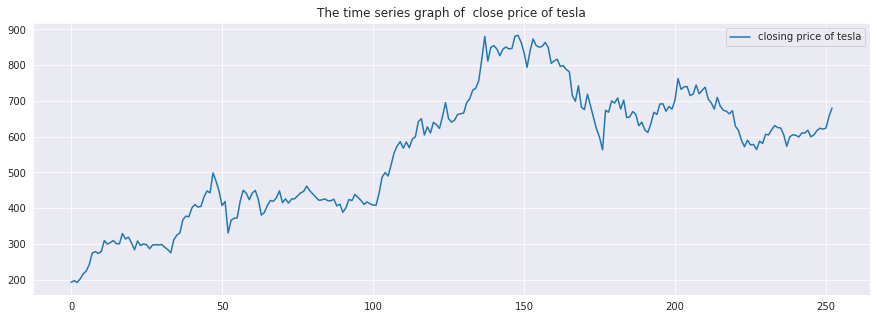

In [11]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
plt.plot(df['Close'],label='closing price of tesla')
plt.title("The time series graph of  close price of tesla")
plt.legend(loc='best')


In [12]:
#creating adata frame using twith data and the close
data=df[['Date','Close']]
data.head()

,Date,Close
0,2020-06-24,192.169998
1,2020-06-25,197.195999
2,2020-06-26,191.947998
3,2020-06-29,201.869995
4,2020-06-30,215.962006


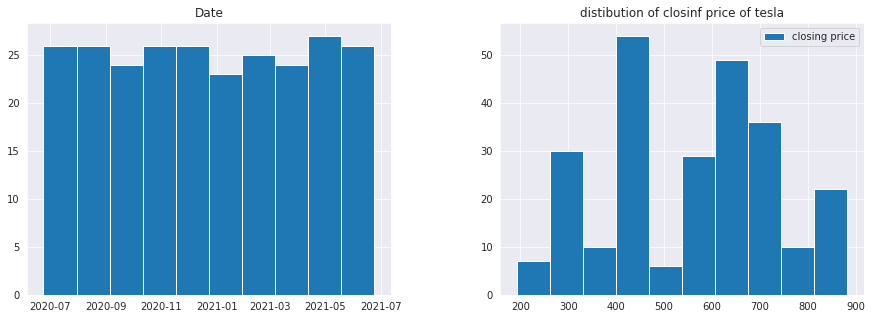

In [13]:
data.hist(figsize=(15,5),label='closing price')
plt.title("distibution of closinf price of tesla")
plt.legend(loc='best')

In [16]:
import fbprophet

In [17]:

from fbprophet import Prophet

In [20]:
df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format=True)
data = data[["Date", "Close"]]

In [21]:
data = data.rename(columns={"Date" : "ds", "Close" : "y" })

In [22]:
model = Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/karimi/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,yhat,yhat_lower,yhat_upper
613,2022-06-20,102.444968,-430.457432,657.439659
614,2022-06-21,104.859853,-414.954558,635.886450
615,2022-06-22,101.852651,-420.742639,637.732354
616,2022-06-23,100.570318,-444.553007,654.882442
617,2022-06-24,98.779736,-443.900709,625.906359


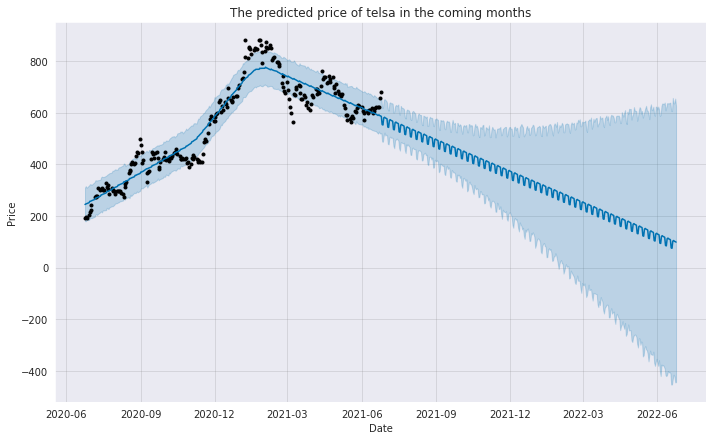

In [26]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")
plt.title('The predicted price of telsa in the coming months')
plt.show()

It seems like Tesla’s stock prices will decrease in the coming future if they don’t come up with a new idea of 

representing their vision. This may be possible as other companies have also started manufacturing electric 

vehicles at a very low price as compared to Tesla

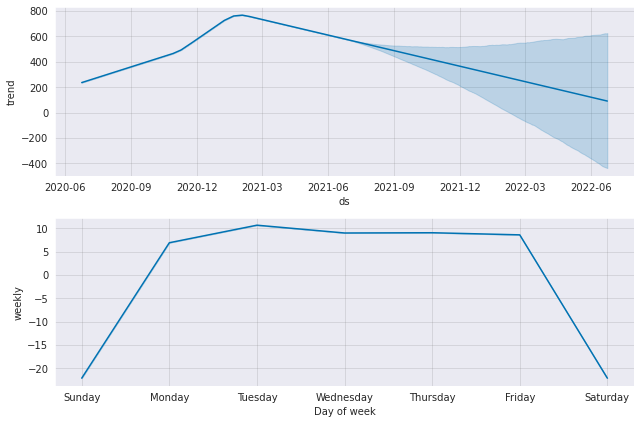

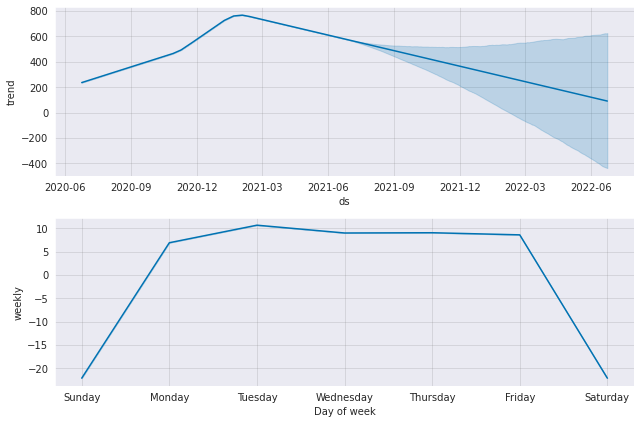

In [28]:
#checking the trend
model.plot_components(forcast)